### This file plots the processed csv files with matplotlib

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [16]:
date = '2018-11-09_13h02'
worker_list =[8,16,32,64]
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/3_ThroughputForWrites/processed_data/' + date + '/'

## Throughput plot for write loads

In [17]:
# read data into pandas dataframe
df_tp = pd.read_csv(base_path + 'full_write_mem_tp.csv')
df_tp

,client,worker,write_tp_mean,write_tp_std
0,6,8,3239.644869,46.959772
1,6,16,3255.203421,40.492767
2,6,32,3261.233333,34.923349
3,6,64,3319.161905,28.238008
4,24,8,8283.658954,95.342584
5,24,16,8480.014286,96.538778
6,24,32,8393.207713,68.414829
7,24,64,8308.800000,59.293949
8,48,8,9013.987793,42.272779
9,48,16,11044.104762,913.933430


In [18]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

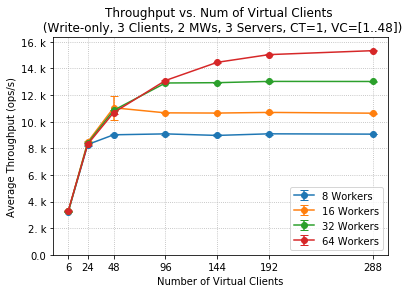

In [19]:
f = plt.figure()
plt.title("Throughput vs. Num of Virtual Clients \n (Write-only, 3 Clients, 2 MWs, 3 Servers, CT=1, VC=[1..48])")

for worker in worker_list:
    # extract values of interest
    df_tp_read_cut = df_tp[(df_tp.worker == worker)]
    
    vcs = df_tp_read_cut['client']
    tps = df_tp_read_cut['write_tp_mean']
    std = df_tp_read_cut['write_tp_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Throughput (ops/s)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e3+np.max(df_tp['write_tp_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/3_ThroughputForWrites/processed_data/"+date+"/full_write_mem_tp_write.png", dpi = 150)


## Response-time plot for write loads

In [20]:
# read data into pandas dataframe
df_rt = pd.read_csv(base_path + 'full_write_mem_rt.csv')
df_rt

,client,worker,write_rt_mean,write_rt_std
0,6,8,1.851843,0.027802
1,6,16,1.845904,0.026694
2,6,32,1.841778,0.025573
3,6,64,1.803548,0.015757
4,24,8,2.898919,0.032683
5,24,16,2.833310,0.031742
6,24,32,2.863932,0.025492
7,24,64,2.895730,0.021760
8,48,8,5.329039,0.024031
9,48,16,4.400238,0.307763


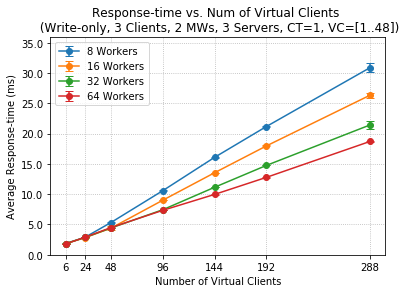

In [21]:
f = plt.figure()
plt.title("Response-time vs. Num of Virtual Clients \n (Write-only, 3 Clients, 2 MWs, 3 Servers, CT=1, VC=[1..48])")

for worker in worker_list:
    # extract values of interest
    df_rt_cut = df_rt[(df_rt.worker == worker)]
    
    vcs = df_rt_cut['client']
    tps = df_rt_cut['write_rt_mean']
    std = df_rt_cut['write_rt_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Average Response-time (ms)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=np.max(df_rt['write_rt_mean'])+5)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/3_ThroughputForWrites/processed_data/"+date+"/full_write_mem_rt_write.png", dpi = 150)
